This study aims to simulate the Rainfall-Runoff (R-R) process within a watershed. However, due to the lack of hydroclimatological data in the target area, remote sensing data was used instead. The Climate Hazards Group InfraRed Precipitation with Station data (CHIRPS) and Moderate Resolution Imaging Spectroradiometer/land surface temperature (MODIS-LST) data were obtained from Google Earth Engine. As the satellite-based hydroclimatology data is pixel data, the Thyssen polygon method was used to calculate the spatial average values of precipitation and temperature, which were then used as input for the models. To increase the accuracy of the modeling, an innovative pre-processing method called GF-WT was used. This method uses the Wavelet Transform analysis method followed by the Gaussian Filter analysis method to reveal hidden patterns in the data. The resulting data were then given to CatBoost and Voting algorithms, and their hyperparameters were tuned. Finally, the accuracy of each model was checked to determine the best performing model.

As such, the steps are as follows:
Step 1: pre-processing (Wavelet Transform)
Step 2: pre-processing (Gaussian Decomposition)
Step 3: pre-processing (Sliding Window)
Step 4: ML modeling & accuracy evaluation
Step 5: Visualization

# Step 1: pre-processing (Wavelet Transform)

In [1]:
# Rainfall

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import sys

In [3]:
df = pd.read_csv(r"C:\Users\Mostafa\Desktop\num2.csv")

data = df.iloc[:,1]
data = data.to_list()

index = [i+1 for i in range(len(data))]

df.head()

,Date,RS_Rainfall,RS_Temperature_BC
0,7-Aug,4.289,26.668391
1,7-Sep,7.983,23.330215
2,7-Oct,5.974,17.952918
3,7-Nov,6.352,10.936463
4,7-Dec,20.146,-5.941111


In [4]:
# Create wavelet object and define parameters
w = pywt.Wavelet('sym4')
maxlev = pywt.dwt_max_level(len(data), w.dec_len)
# maxlev = 2 # Override if desired
print("maximum level is " + str(maxlev))

threshold = [0.001, 0.01, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7]

maximum level is 4


In [5]:
# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(data, 'sym4', level=maxlev)

In [6]:
a5 = []
for j in range(len(threshold)):
    #plt.figure()
    for i in range(1, len(coeffs)):
        #plt.subplot(maxlev, 1, i)
        #plt.plot(coeffs[i])
        coeffs[i] = pywt.threshold(coeffs[i], threshold[j]*max(coeffs[i]))
        #plt.plot(coeffs[i])
    datarec = pywt.waverec(coeffs, 'sym4')
    a5.append(datarec)

In [7]:
a6 = pd.DataFrame(a5)
a6 = a6.transpose()

In [8]:
final_df1 = pd.concat([df.iloc[:,1], a6], axis = 1)
#final_df.to_csv(r"C:\Users\Mostafa\Desktop\num11.csv",index = False)

In [9]:
# Temperature

In [10]:
data = df.iloc[:,2]
data = data.to_list()

index = [i+1 for i in range(len(data))]

In [11]:
# Create wavelet object and define parameters
w = pywt.Wavelet('sym4')
maxlev = pywt.dwt_max_level(len(data), w.dec_len)
# maxlev = 2 # Override if desired
print("maximum level is " + str(maxlev))
threshold = [0.001, 0.01, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7]

maximum level is 4


In [12]:
# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(data, 'sym4', level=maxlev)

In [13]:
a5 = []
for j in range(len(threshold)):
    #plt.figure()
    for i in range(1, len(coeffs)):
        #plt.subplot(maxlev, 1, i)
        #plt.plot(coeffs[i])
        coeffs[i] = pywt.threshold(coeffs[i], threshold[j]*max(coeffs[i]))
        #plt.plot(coeffs[i])
    datarec = pywt.waverec(coeffs, 'sym4')
    a5.append(datarec)

In [14]:
a6 = pd.DataFrame(a5)
a6 = a6.transpose()

In [15]:
final_df2 = pd.concat([df.iloc[:,2], a6], axis = 1)

final_df = pd.concat([final_df1,final_df2], axis = 1)

#final_df.to_csv(r"C:\Users\Mostafa\Desktop\num11.csv",index = False)

#df2 = pd.read_csv(r"C:\Users\Mostafa\Desktop\num_pre.csv")

final_df = pd.concat([final_df], axis = 1)
final_df.to_csv(r"C:\Users\Mostafa\Desktop\num3.csv",index = False)

# Step 2: pre-processing (Gaussian Decomposition)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter1d

In [17]:
df = pd.read_csv(r"C:\Users\Mostafa\Desktop\num2.csv")
X= df.iloc[:,1]
p1 = df.iloc[:,-1]
df.head()

,Date,RS_Rainfall,RS_Temperature_BC
0,7-Aug,4.289,26.668391
1,7-Sep,7.983,23.330215
2,7-Oct,5.974,17.952918
3,7-Nov,6.352,10.936463
4,7-Dec,20.146,-5.941111


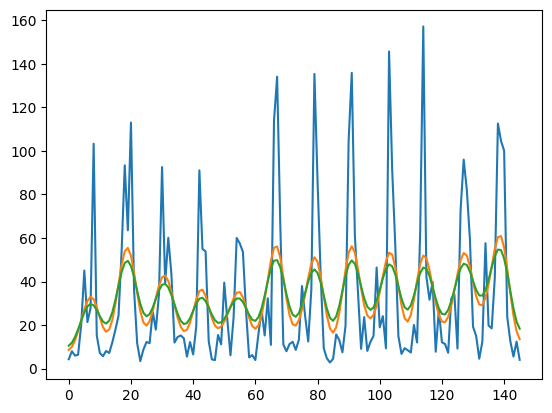

In [18]:
data = df.iloc[:,1]

a1 = gaussian_filter1d(data, 2.5)
a2 = gaussian_filter1d(data, 3)

plt.plot(data)
plt.plot(a1)
plt.plot(a2)

In [19]:
ax = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10]

b1 = []
for i in ax:
    aaa = gaussian_filter1d(X , i)
    xxx = pd.DataFrame(aaa)
    b1.append(xxx)

In [20]:
ax = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10]

b2 = []
for j in ax:
    vvv = gaussian_filter1d(p1 , j)
    fwf= pd.DataFrame(vvv)
    b2.append(fwf)

In [21]:
X_list = [X]
p1_list = [p1]

In [22]:
b_kol = X_list + b1 + p1_list + b2
print(len(b1))
print(len(b2))
print(type(b_kol))
print(len(b_kol))

99
99
<class 'list'>
200


In [23]:
df_all_cols = pd.concat(b_kol, axis = 1)

df_all_cols.to_csv("C:/Users/Mostafa/Desktop/num_pre.csv", index=False)

# Step 3: pre-processing (Sliding Window)

In [24]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import array

In [25]:
df1= pd.read_csv("C:/Users/Mostafa/Desktop/num3.csv")
df2= pd.read_csv("C:/Users/Mostafa/Desktop/num_pre.csv")

"""df = pd.read_csv("C:/Users/Mostafa/Desktop/num3.csv")
df.head()"""

df = pd.concat([df1, df2], axis = 1)
print(df1.shape)
print(df2.shape)
print(df.shape)
df.head(5)

(146, 60)
(146, 200)
(146, 260)


,RS_Rainfall,0,1,2,3,4,5,6,7,8,...,0.188,0.189,0.190,0.191,0.192,0.193,0.194,0.195,0.196,0.197
0,4.289,4.380169,5.290952,8.264224,9.847178,10.360006,10.630745,10.904837,11.071322,11.802114,...,13.082074,13.088725,13.094967,13.101136,13.106974,13.112615,13.118098,13.123380,13.128367,13.133302
1,7.983,7.974395,7.888436,6.644553,7.392235,8.092458,9.128681,10.217168,11.208985,12.892525,...,13.089289,13.095632,13.101563,13.107362,13.112910,13.118275,13.123454,13.128478,13.133210,13.137906
2,5.974,5.964791,5.872792,6.135488,6.029386,6.514449,7.846584,9.633172,11.409440,13.970828,...,13.103392,13.108998,13.114312,13.119509,13.124498,13.129332,13.133912,13.138439,13.142693,13.146930
3,6.352,6.370252,6.552586,8.105422,10.624890,10.736986,11.786403,12.753653,13.634985,15.245281,...,13.123625,13.128188,13.132630,13.136895,13.141079,13.145143,13.149012,13.152839,13.156579,13.160197
4,20.146,20.080719,19.428566,16.413843,13.931156,15.453268,18.059586,18.039174,17.379695,17.350371,...,13.148896,13.152214,13.155585,13.158737,13.161933,13.165054,13.168178,13.171165,13.174245,13.177120


In [26]:
a1 = []
for i in range(len(df.columns)):
    a1.append(df.iloc[:,i])

In [27]:
def window(iterable, size=2):
    i = iter(iterable)
    win = []
    for e in range(0, size):
        win.append(next(i))
    yield win
    for e in i:
        win = win[1:] + [e]
        yield win

In [28]:
size = 1
a2 = []
for j in range(len(df.columns)):
    a2.append(pd.DataFrame(window(a1[j], size = size)))

In [29]:
a_total = pd.concat(a2, axis = 1)
a_total

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,4.289,4.380169,5.290952,8.264224,9.847178,10.360006,10.630745,10.904837,11.071322,11.802114,...,13.082074,13.088725,13.094967,13.101136,13.106974,13.112615,13.118098,13.123380,13.128367,13.133302
1,7.983,7.974395,7.888436,6.644553,7.392235,8.092458,9.128681,10.217168,11.208985,12.892525,...,13.089289,13.095632,13.101563,13.107362,13.112910,13.118275,13.123454,13.128478,13.133210,13.137906
2,5.974,5.964791,5.872792,6.135488,6.029386,6.514449,7.846584,9.633172,11.409440,13.970828,...,13.103392,13.108998,13.114312,13.119509,13.124498,13.129332,13.133912,13.138439,13.142693,13.146930
3,6.352,6.370252,6.552586,8.105422,10.624890,10.736986,11.786403,12.753653,13.634985,15.245281,...,13.123625,13.128188,13.132630,13.136895,13.141079,13.145143,13.149012,13.152839,13.156579,13.160197
4,20.146,20.080719,19.428566,16.413843,13.931156,15.453268,18.059586,18.039174,17.379695,17.350371,...,13.148896,13.152214,13.155585,13.158737,13.161933,13.165054,13.168178,13.171165,13.174245,13.177120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,23.778,23.799992,24.019692,24.983133,26.856211,28.949015,32.381310,36.131485,39.295660,39.120406,...,15.831655,15.818276,15.805455,15.792636,15.780270,15.768144,15.755981,15.744285,15.732649,15.721378
142,12.526,12.610751,13.457409,16.496531,20.160635,23.729943,24.783840,25.717541,26.849045,29.668322,...,15.926634,15.909316,15.892520,15.876091,15.860181,15.844699,15.829534,15.814849,15.800472,15.786531
143,5.512,5.501478,5.396360,6.432761,9.168338,12.440649,14.837679,17.197130,19.605402,22.514176,...,16.002522,15.981844,15.961758,15.942413,15.923591,15.905353,15.887771,15.870647,15.854038,15.837926
144,12.404,12.372308,12.055703,9.763719,8.379091,8.385596,10.420671,12.507875,14.568986,16.558038,...,16.055395,16.032330,16.009896,15.988488,15.967594,15.947400,15.928078,15.909222,15.891100,15.873460


In [30]:
#size_1 = size-1
#a5 = a_total.iloc[1:,size_1]
#a6 = np.array(a5)
#a7 = pd.DataFrame(a6)

df = pd.read_csv(r"C:\Users\Mostafa\Desktop\Rainfall-runoff\Alingar_IHACRES.csv")
a5 = df.iloc[size-1:,-1]
a6 = np.array(a5)
a7 = pd.DataFrame(a6)

a_total2 = pd.concat([a_total , a7], axis = 1)

a_total2= a_total2[:-1]

a_total2.to_csv("C:/Users/Mostafa/Desktop/num4.csv", index=False)

# Step 4: ML modeling & accuracy evaluation

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

np.random.seed(1337)

In [32]:
df = pd.read_csv("C:/Users/Mostafa/Desktop/num4.csv")

In [33]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import NuSVR
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from xgboost import XGBRegressor
import catboost as cb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from skelm import ELMRegressor

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import RidgeCV

In [35]:
#regr1 = ExtraTreesRegressor(n_estimators= 250, criterion= "poisson")
#regr1.fit(X_train, y_train)

r1 = ExtraTreeRegressor(criterion= "friedman_mse")
r2 = RandomForestRegressor(n_estimators = 400)
""" r3 = MLPRegressor(hidden_layer_sizes=(350,), max_iter= 435) """
r3 = XGBRegressor(booster= "gblinear", objective= "reg:tweedie")
r4 = cb.CatBoostRegressor(iterations= 1000, learning_rate= 0.1, l2_leaf_reg= 0.5)
#r5 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])

regr1 = VotingRegressor([('r1', r1), ('r2', r2), ('r3', r3), ('r4', r4)], weights= [0.3, 0.15, 0.25, 1.1])
regr1.fit(X_train, y_train)

""" regr2 = ExtraTreeRegressor()
regr2.fit(X_train, y_train) """

""" regr4 = ExtraTreeRegressor()
regr4.fit(X_train, y_train) """

""" regr4 = MLPRegressor(hidden_layer_sizes=(550,), max_iter= 435)
regr4.fit(X_train, y_train) """

""" regr5 = HistGradientBoostingRegressor()
regr5.fit(X_train, y_train) """

""" regr5 = MLPRegressor()
regr5.fit(X_train, y_train) """

0:	learn: 65.9059577	total: 119ms	remaining: 1m 58s
1:	learn: 62.3983810	total: 154ms	remaining: 1m 16s
2:	learn: 58.6334266	total: 188ms	remaining: 1m 2s
3:	learn: 55.5042992	total: 229ms	remaining: 57s
4:	learn: 52.5874513	total: 261ms	remaining: 52s
5:	learn: 49.8723125	total: 294ms	remaining: 48.7s
6:	learn: 47.0418854	total: 328ms	remaining: 46.5s
7:	learn: 44.1676791	total: 364ms	remaining: 45.1s
8:	learn: 41.5287741	total: 395ms	remaining: 43.5s
9:	learn: 39.6181189	total: 425ms	remaining: 42.1s
10:	learn: 37.7823903	total: 457ms	remaining: 41.1s
11:	learn: 35.7582429	total: 489ms	remaining: 40.2s
12:	learn: 33.9500402	total: 522ms	remaining: 39.6s
13:	learn: 32.5486517	total: 560ms	remaining: 39.5s
14:	learn: 31.2634402	total: 592ms	remaining: 38.9s
15:	learn: 30.0936602	total: 623ms	remaining: 38.3s
16:	learn: 28.9429082	total: 655ms	remaining: 37.9s
17:	learn: 28.2858652	total: 686ms	remaining: 37.4s
18:	learn: 26.9809018	total: 724ms	remaining: 37.4s
19:	learn: 25.8099587	to

163:	learn: 0.4916694	total: 5.86s	remaining: 29.8s
164:	learn: 0.4801019	total: 5.89s	remaining: 29.8s
165:	learn: 0.4661463	total: 5.92s	remaining: 29.8s
166:	learn: 0.4570775	total: 5.96s	remaining: 29.7s
167:	learn: 0.4508415	total: 5.99s	remaining: 29.7s
168:	learn: 0.4432720	total: 6.02s	remaining: 29.6s
169:	learn: 0.4316813	total: 6.05s	remaining: 29.6s
170:	learn: 0.4232975	total: 6.09s	remaining: 29.5s
171:	learn: 0.4092632	total: 6.12s	remaining: 29.5s
172:	learn: 0.4015285	total: 6.15s	remaining: 29.4s
173:	learn: 0.3953699	total: 6.2s	remaining: 29.4s
174:	learn: 0.3875054	total: 6.23s	remaining: 29.4s
175:	learn: 0.3782802	total: 6.26s	remaining: 29.3s
176:	learn: 0.3688992	total: 6.3s	remaining: 29.3s
177:	learn: 0.3594098	total: 6.33s	remaining: 29.2s
178:	learn: 0.3496444	total: 6.37s	remaining: 29.2s
179:	learn: 0.3425728	total: 6.4s	remaining: 29.1s
180:	learn: 0.3355430	total: 6.43s	remaining: 29.1s
181:	learn: 0.3300944	total: 6.47s	remaining: 29.1s
182:	learn: 0.3

324:	learn: 0.0144940	total: 11.2s	remaining: 23.3s
325:	learn: 0.0141772	total: 11.2s	remaining: 23.2s
326:	learn: 0.0138375	total: 11.3s	remaining: 23.2s
327:	learn: 0.0133132	total: 11.3s	remaining: 23.1s
328:	learn: 0.0129630	total: 11.3s	remaining: 23.1s
329:	learn: 0.0124034	total: 11.4s	remaining: 23.1s
330:	learn: 0.0122232	total: 11.4s	remaining: 23s
331:	learn: 0.0119513	total: 11.4s	remaining: 23s
332:	learn: 0.0117239	total: 11.5s	remaining: 23s
333:	learn: 0.0114642	total: 11.5s	remaining: 22.9s
334:	learn: 0.0112434	total: 11.5s	remaining: 22.9s
335:	learn: 0.0110221	total: 11.6s	remaining: 22.8s
336:	learn: 0.0106601	total: 11.6s	remaining: 22.8s
337:	learn: 0.0104383	total: 11.6s	remaining: 22.8s
338:	learn: 0.0102554	total: 11.7s	remaining: 22.7s
339:	learn: 0.0101370	total: 11.7s	remaining: 22.7s
340:	learn: 0.0098842	total: 11.7s	remaining: 22.7s
341:	learn: 0.0096651	total: 11.8s	remaining: 22.6s
342:	learn: 0.0093737	total: 11.8s	remaining: 22.6s
343:	learn: 0.0092

485:	learn: 0.0004842	total: 16.5s	remaining: 17.5s
486:	learn: 0.0004793	total: 16.5s	remaining: 17.4s
487:	learn: 0.0004648	total: 16.6s	remaining: 17.4s
488:	learn: 0.0004529	total: 16.6s	remaining: 17.4s
489:	learn: 0.0004407	total: 16.6s	remaining: 17.3s
490:	learn: 0.0004311	total: 16.7s	remaining: 17.3s
491:	learn: 0.0004204	total: 16.7s	remaining: 17.3s
492:	learn: 0.0004071	total: 16.7s	remaining: 17.2s
493:	learn: 0.0003970	total: 16.8s	remaining: 17.2s
494:	learn: 0.0003903	total: 16.8s	remaining: 17.1s
495:	learn: 0.0003842	total: 16.8s	remaining: 17.1s
496:	learn: 0.0003786	total: 16.9s	remaining: 17.1s
497:	learn: 0.0003698	total: 16.9s	remaining: 17s
498:	learn: 0.0003623	total: 16.9s	remaining: 17s
499:	learn: 0.0003570	total: 17s	remaining: 17s
500:	learn: 0.0003522	total: 17s	remaining: 16.9s
501:	learn: 0.0003448	total: 17s	remaining: 16.9s
502:	learn: 0.0003390	total: 17.1s	remaining: 16.9s
503:	learn: 0.0003350	total: 17.1s	remaining: 16.8s
504:	learn: 0.0003284	to

645:	learn: 0.0000185	total: 21.7s	remaining: 11.9s
646:	learn: 0.0000182	total: 21.7s	remaining: 11.8s
647:	learn: 0.0000177	total: 21.8s	remaining: 11.8s
648:	learn: 0.0000175	total: 21.8s	remaining: 11.8s
649:	learn: 0.0000173	total: 21.8s	remaining: 11.7s
650:	learn: 0.0000170	total: 21.8s	remaining: 11.7s
651:	learn: 0.0000168	total: 21.9s	remaining: 11.7s
652:	learn: 0.0000163	total: 21.9s	remaining: 11.7s
653:	learn: 0.0000158	total: 22s	remaining: 11.6s
654:	learn: 0.0000155	total: 22s	remaining: 11.6s
655:	learn: 0.0000153	total: 22s	remaining: 11.5s
656:	learn: 0.0000150	total: 22.1s	remaining: 11.5s
657:	learn: 0.0000147	total: 22.1s	remaining: 11.5s
658:	learn: 0.0000146	total: 22.1s	remaining: 11.4s
659:	learn: 0.0000143	total: 22.2s	remaining: 11.4s
660:	learn: 0.0000140	total: 22.2s	remaining: 11.4s
661:	learn: 0.0000137	total: 22.2s	remaining: 11.3s
662:	learn: 0.0000136	total: 22.3s	remaining: 11.3s
663:	learn: 0.0000133	total: 22.3s	remaining: 11.3s
664:	learn: 0.0000

807:	learn: 0.0000006	total: 27s	remaining: 6.42s
808:	learn: 0.0000006	total: 27.1s	remaining: 6.39s
809:	learn: 0.0000006	total: 27.1s	remaining: 6.35s
810:	learn: 0.0000006	total: 27.1s	remaining: 6.32s
811:	learn: 0.0000006	total: 27.2s	remaining: 6.29s
812:	learn: 0.0000006	total: 27.2s	remaining: 6.25s
813:	learn: 0.0000005	total: 27.2s	remaining: 6.22s
814:	learn: 0.0000005	total: 27.3s	remaining: 6.19s
815:	learn: 0.0000005	total: 27.3s	remaining: 6.15s
816:	learn: 0.0000005	total: 27.3s	remaining: 6.12s
817:	learn: 0.0000005	total: 27.3s	remaining: 6.08s
818:	learn: 0.0000005	total: 27.4s	remaining: 6.05s
819:	learn: 0.0000005	total: 27.4s	remaining: 6.02s
820:	learn: 0.0000005	total: 27.4s	remaining: 5.98s
821:	learn: 0.0000005	total: 27.5s	remaining: 5.95s
822:	learn: 0.0000005	total: 27.5s	remaining: 5.92s
823:	learn: 0.0000004	total: 27.5s	remaining: 5.88s
824:	learn: 0.0000004	total: 27.6s	remaining: 5.85s
825:	learn: 0.0000004	total: 27.6s	remaining: 5.81s
826:	learn: 0.

969:	learn: 0.0000000	total: 32.4s	remaining: 1s
970:	learn: 0.0000000	total: 32.4s	remaining: 968ms
971:	learn: 0.0000000	total: 32.4s	remaining: 935ms
972:	learn: 0.0000000	total: 32.5s	remaining: 901ms
973:	learn: 0.0000000	total: 32.5s	remaining: 868ms
974:	learn: 0.0000000	total: 32.5s	remaining: 834ms
975:	learn: 0.0000000	total: 32.6s	remaining: 801ms
976:	learn: 0.0000000	total: 32.6s	remaining: 768ms
977:	learn: 0.0000000	total: 32.6s	remaining: 734ms
978:	learn: 0.0000000	total: 32.7s	remaining: 701ms
979:	learn: 0.0000000	total: 32.7s	remaining: 667ms
980:	learn: 0.0000000	total: 32.7s	remaining: 634ms
981:	learn: 0.0000000	total: 32.8s	remaining: 601ms
982:	learn: 0.0000000	total: 32.8s	remaining: 567ms
983:	learn: 0.0000000	total: 32.8s	remaining: 534ms
984:	learn: 0.0000000	total: 32.9s	remaining: 501ms
985:	learn: 0.0000000	total: 32.9s	remaining: 467ms
986:	learn: 0.0000000	total: 32.9s	remaining: 434ms
987:	learn: 0.0000000	total: 33s	remaining: 400ms
988:	learn: 0.000

' regr5 = MLPRegressor()\nregr5.fit(X_train, y_train) '

In [36]:
regr4 = cb.CatBoostRegressor(iterations= 1000, learning_rate= 0.1)
regr4.fit(X_train, y_train)

0:	learn: 67.5799737	total: 45.2ms	remaining: 45.1s
1:	learn: 64.7309036	total: 76.8ms	remaining: 38.3s
2:	learn: 61.9074217	total: 108ms	remaining: 36s
3:	learn: 59.7144490	total: 140ms	remaining: 34.8s
4:	learn: 57.5588013	total: 171ms	remaining: 34.1s
5:	learn: 55.2061809	total: 203ms	remaining: 33.7s
6:	learn: 52.9049474	total: 234ms	remaining: 33.2s
7:	learn: 50.3320413	total: 271ms	remaining: 33.6s
8:	learn: 47.8827510	total: 303ms	remaining: 33.4s
9:	learn: 46.5331016	total: 334ms	remaining: 33.1s
10:	learn: 45.2070720	total: 365ms	remaining: 32.9s
11:	learn: 43.5674517	total: 399ms	remaining: 32.8s
12:	learn: 42.2023306	total: 436ms	remaining: 33.1s
13:	learn: 41.1010029	total: 478ms	remaining: 33.7s
14:	learn: 39.8114629	total: 515ms	remaining: 33.8s
15:	learn: 38.6288726	total: 548ms	remaining: 33.7s
16:	learn: 37.7206304	total: 581ms	remaining: 33.6s
17:	learn: 36.6271970	total: 613ms	remaining: 33.4s
18:	learn: 35.4285082	total: 644ms	remaining: 33.2s
19:	learn: 34.6389409	

166:	learn: 2.4090079	total: 5.65s	remaining: 28.2s
167:	learn: 2.3815282	total: 5.68s	remaining: 28.2s
168:	learn: 2.3461446	total: 5.72s	remaining: 28.1s
169:	learn: 2.3196652	total: 5.75s	remaining: 28.1s
170:	learn: 2.2707820	total: 5.78s	remaining: 28s
171:	learn: 2.2473849	total: 5.81s	remaining: 28s
172:	learn: 2.1925693	total: 5.85s	remaining: 27.9s
173:	learn: 2.1456829	total: 5.88s	remaining: 27.9s
174:	learn: 2.0964851	total: 5.92s	remaining: 27.9s
175:	learn: 2.0756551	total: 5.96s	remaining: 27.9s
176:	learn: 2.0452191	total: 5.99s	remaining: 27.8s
177:	learn: 2.0287045	total: 6.02s	remaining: 27.8s
178:	learn: 2.0057033	total: 6.05s	remaining: 27.7s
179:	learn: 1.9841913	total: 6.08s	remaining: 27.7s
180:	learn: 1.9624864	total: 6.12s	remaining: 27.7s
181:	learn: 1.9492948	total: 6.15s	remaining: 27.6s
182:	learn: 1.9192900	total: 6.18s	remaining: 27.6s
183:	learn: 1.8789514	total: 6.21s	remaining: 27.5s
184:	learn: 1.8306356	total: 6.24s	remaining: 27.5s
185:	learn: 1.79

327:	learn: 0.2929738	total: 11.1s	remaining: 22.7s
328:	learn: 0.2882579	total: 11.1s	remaining: 22.6s
329:	learn: 0.2831637	total: 11.1s	remaining: 22.6s
330:	learn: 0.2800659	total: 11.2s	remaining: 22.6s
331:	learn: 0.2773134	total: 11.2s	remaining: 22.5s
332:	learn: 0.2755481	total: 11.2s	remaining: 22.5s
333:	learn: 0.2708683	total: 11.3s	remaining: 22.5s
334:	learn: 0.2647415	total: 11.3s	remaining: 22.4s
335:	learn: 0.2604454	total: 11.3s	remaining: 22.4s
336:	learn: 0.2580481	total: 11.4s	remaining: 22.4s
337:	learn: 0.2548974	total: 11.4s	remaining: 22.3s
338:	learn: 0.2522983	total: 11.4s	remaining: 22.3s
339:	learn: 0.2496111	total: 11.5s	remaining: 22.3s
340:	learn: 0.2459340	total: 11.5s	remaining: 22.2s
341:	learn: 0.2424784	total: 11.5s	remaining: 22.2s
342:	learn: 0.2403220	total: 11.6s	remaining: 22.2s
343:	learn: 0.2357783	total: 11.6s	remaining: 22.1s
344:	learn: 0.2325701	total: 11.6s	remaining: 22.1s
345:	learn: 0.2309230	total: 11.7s	remaining: 22.1s
346:	learn: 

487:	learn: 0.0402563	total: 16.4s	remaining: 17.2s
488:	learn: 0.0396981	total: 16.4s	remaining: 17.2s
489:	learn: 0.0388506	total: 16.4s	remaining: 17.1s
490:	learn: 0.0380878	total: 16.5s	remaining: 17.1s
491:	learn: 0.0375937	total: 16.5s	remaining: 17s
492:	learn: 0.0372544	total: 16.5s	remaining: 17s
493:	learn: 0.0365421	total: 16.6s	remaining: 17s
494:	learn: 0.0360463	total: 16.6s	remaining: 16.9s
495:	learn: 0.0358265	total: 16.6s	remaining: 16.9s
496:	learn: 0.0354514	total: 16.7s	remaining: 16.9s
497:	learn: 0.0349966	total: 16.7s	remaining: 16.8s
498:	learn: 0.0345741	total: 16.7s	remaining: 16.8s
499:	learn: 0.0341141	total: 16.8s	remaining: 16.8s
500:	learn: 0.0335587	total: 16.8s	remaining: 16.7s
501:	learn: 0.0333163	total: 16.8s	remaining: 16.7s
502:	learn: 0.0329013	total: 16.9s	remaining: 16.7s
503:	learn: 0.0325093	total: 16.9s	remaining: 16.6s
504:	learn: 0.0321462	total: 16.9s	remaining: 16.6s
505:	learn: 0.0319494	total: 17s	remaining: 16.6s
506:	learn: 0.031780

652:	learn: 0.0047598	total: 21.8s	remaining: 11.6s
653:	learn: 0.0046615	total: 21.9s	remaining: 11.6s
654:	learn: 0.0046308	total: 21.9s	remaining: 11.5s
655:	learn: 0.0045808	total: 22s	remaining: 11.5s
656:	learn: 0.0045183	total: 22s	remaining: 11.5s
657:	learn: 0.0044512	total: 22s	remaining: 11.4s
658:	learn: 0.0043844	total: 22.1s	remaining: 11.4s
659:	learn: 0.0042942	total: 22.1s	remaining: 11.4s
660:	learn: 0.0042752	total: 22.1s	remaining: 11.3s
661:	learn: 0.0042363	total: 22.1s	remaining: 11.3s
662:	learn: 0.0042026	total: 22.2s	remaining: 11.3s
663:	learn: 0.0041422	total: 22.2s	remaining: 11.2s
664:	learn: 0.0041109	total: 22.2s	remaining: 11.2s
665:	learn: 0.0040571	total: 22.3s	remaining: 11.2s
666:	learn: 0.0040173	total: 22.3s	remaining: 11.1s
667:	learn: 0.0039458	total: 22.3s	remaining: 11.1s
668:	learn: 0.0038734	total: 22.4s	remaining: 11.1s
669:	learn: 0.0038306	total: 22.4s	remaining: 11s
670:	learn: 0.0037621	total: 22.5s	remaining: 11s
671:	learn: 0.0037052	

815:	learn: 0.0006383	total: 27.3s	remaining: 6.16s
816:	learn: 0.0006281	total: 27.3s	remaining: 6.12s
817:	learn: 0.0006188	total: 27.4s	remaining: 6.09s
818:	learn: 0.0006136	total: 27.4s	remaining: 6.06s
819:	learn: 0.0006060	total: 27.5s	remaining: 6.03s
820:	learn: 0.0005995	total: 27.5s	remaining: 5.99s
821:	learn: 0.0005942	total: 27.5s	remaining: 5.96s
822:	learn: 0.0005911	total: 27.6s	remaining: 5.93s
823:	learn: 0.0005800	total: 27.6s	remaining: 5.89s
824:	learn: 0.0005758	total: 27.6s	remaining: 5.86s
825:	learn: 0.0005700	total: 27.7s	remaining: 5.83s
826:	learn: 0.0005587	total: 27.7s	remaining: 5.79s
827:	learn: 0.0005519	total: 27.7s	remaining: 5.76s
828:	learn: 0.0005434	total: 27.8s	remaining: 5.73s
829:	learn: 0.0005369	total: 27.8s	remaining: 5.69s
830:	learn: 0.0005292	total: 27.8s	remaining: 5.66s
831:	learn: 0.0005241	total: 27.9s	remaining: 5.63s
832:	learn: 0.0005164	total: 27.9s	remaining: 5.59s
833:	learn: 0.0005056	total: 27.9s	remaining: 5.56s
834:	learn: 

979:	learn: 0.0000875	total: 32.9s	remaining: 672ms
980:	learn: 0.0000868	total: 33s	remaining: 638ms
981:	learn: 0.0000855	total: 33s	remaining: 605ms
982:	learn: 0.0000847	total: 33s	remaining: 571ms
983:	learn: 0.0000842	total: 33.1s	remaining: 537ms
984:	learn: 0.0000827	total: 33.1s	remaining: 504ms
985:	learn: 0.0000818	total: 33.1s	remaining: 470ms
986:	learn: 0.0000809	total: 33.2s	remaining: 437ms
987:	learn: 0.0000803	total: 33.2s	remaining: 403ms
988:	learn: 0.0000797	total: 33.2s	remaining: 369ms
989:	learn: 0.0000789	total: 33.3s	remaining: 336ms
990:	learn: 0.0000779	total: 33.3s	remaining: 302ms
991:	learn: 0.0000775	total: 33.3s	remaining: 269ms
992:	learn: 0.0000764	total: 33.4s	remaining: 235ms
993:	learn: 0.0000758	total: 33.4s	remaining: 202ms
994:	learn: 0.0000748	total: 33.4s	remaining: 168ms
995:	learn: 0.0000738	total: 33.5s	remaining: 134ms
996:	learn: 0.0000731	total: 33.5s	remaining: 101ms
997:	learn: 0.0000727	total: 33.5s	remaining: 67.2ms
998:	learn: 0.000

In [37]:
pred1 = regr1.predict(X_test)

""" pred2 = regr2.predict(X_test)
pred3 = regr3.predict(X_test) """
pred4 = regr4.predict(X_test)
""" pred5 = regr5.predict(X_test) """

' pred5 = regr5.predict(X_test) '

In [38]:
print(len(pred1))
""" print(len(pred2))
print(len(pred3)) """
print(len(pred4))
""" print(len(pred5)) """

29
29


' print(len(pred5)) '

In [39]:
y_test = y_test.values.tolist()
pred1 = pred1.tolist()
""" pred2 = pred2.tolist()
pred3 = pred3.tolist() """
pred4 = pred4.tolist()
""" pred5 = pred5.tolist() """

' pred5 = pred5.tolist() '

In [40]:
from SeqMetrics import RegressionMetrics

er1 = RegressionMetrics(y_test, pred1)

print(er1.corr_coeff())
print(er1.nse())
print(er1.mae())
print(er1.rmse())
print(er1.pbias())

print("-----------------")

er2 = RegressionMetrics(y_test, pred4)

print(er2.corr_coeff())
print(er2.nse())
print(er2.mae())
print(er2.rmse())
print(er2.pbias())
""" 
print("-----------------")

er3 = RegressionMetrics(y_test, pred5)

print(er3.corr_coeff())
print(er3.nse())
print(er3.mae())
print(er3.rmse()) """

0.9000142471675905
0.7930665764940535
21.0181552618931
29.986887478087507
8.93381186867957
-----------------
0.9033924921214761
0.8098273970944974
18.33478540158231
28.74683551477007
5.125976292751345


' \nprint("-----------------")\n\ner3 = RegressionMetrics(y_test, pred5)\n\nprint(er3.corr_coeff())\nprint(er3.nse())\nprint(er3.mae())\nprint(er3.rmse()) '

# Step 5: Visualization

In [41]:
from pandas import DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_3968\3292614743.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


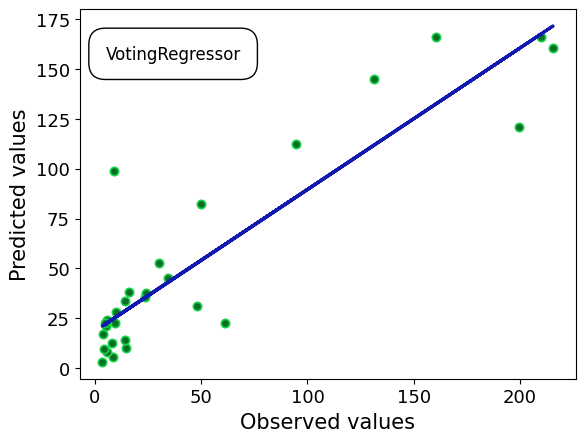

In [42]:
data1 = {'X': y_test, 'Y':pred1}

df1 = DataFrame(data1, columns= ['X', 'Y'])

m1, b1, r_value1, p_value1, std_err1 = scipy.stats.linregress(df1['X'], df1['Y'])

fig, ax = plt.subplots()
ax.scatter(df1['X'],df1['Y'], marker = "o", color = "#0a6e25" , linewidths = 1.2, edgecolors = "#19d14b")
ax.plot(df1['X'], m1*df1['X'] + b1, color = "#101ab0", linewidth = 2.2)
#plt.text(0, 29.5, "R\u00b2 = {}".format(round(r1**2,5)), fontsize = 16)
#plt.text(0, 5.4, "KGE = {}".format(kge1), fontsize = 16)
#plt.text(0, 4.9, "NSE = {}".format(nse1), fontsize = 16)

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

ax.text(5.0, 158, "VotingRegressor", fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

plt.xlabel(("Observed values"), fontsize = 15)
plt.ylabel(("Predicted values"), fontsize = 15)

fig.show()

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_3968\1060180663.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


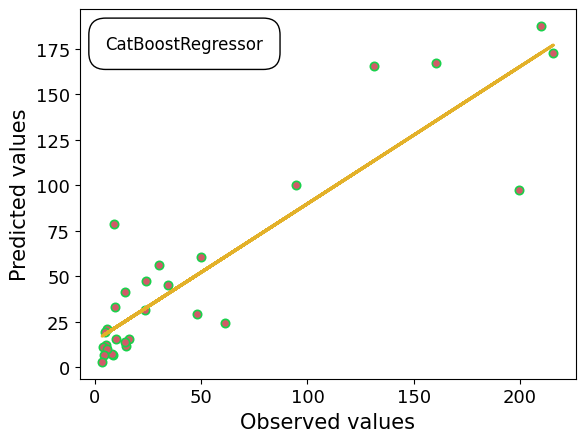

In [43]:
data1 = {'X': y_test, 'Y':pred4}

df1 = DataFrame(data1, columns= ['X', 'Y'])

m1, b1, r_value1, p_value1, std_err1 = scipy.stats.linregress(df1['X'], df1['Y'])

fig, ax = plt.subplots()
ax.scatter(df1['X'],df1['Y'], marker = "o", color = "#d15a68" , linewidths = 1.2, edgecolors = "#19d14b")
ax.plot(df1['X'], m1*df1['X'] + b1, color = "#e3b129", linewidth = 2.2)
#plt.text(0, 29.5, "R\u00b2 = {}".format(round(r1**2,5)), fontsize = 16)
#plt.text(0, 5.4, "KGE = {}".format(kge1), fontsize = 16)
#plt.text(0, 4.9, "NSE = {}".format(nse1), fontsize = 16)

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

ax.text(5.0, 175, "CatBoostRegressor", fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

plt.xlabel(("Observed values"), fontsize = 15)
plt.ylabel(("Predicted values"), fontsize = 15)

fig.show()